In [33]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

In [4]:
books_data = pd.read_csv(r'book.csv')
# books_data.shape                                  # (2000,11)
books_data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [31]:
# apply apriory algorith :
frequent_items_book = apriori(books_data,min_support=0.01, use_colnames=True)     # 0.1 for ease of calculation.
frequent_items_book

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
589,0.0125,"(CookBks, ArtBks, ItalArt, RefBks, ItalCook, I..."
590,0.0145,"(ChildBks, CookBks, ArtBks, GeogBks, DoItYBks,..."
591,0.0105,"(ChildBks, CookBks, ArtBks, GeogBks, DoItYBks,..."
592,0.0100,"(ChildBks, CookBks, ArtBks, GeogBks, RefBks, I..."


In [29]:
# create rules :
rules_book = association_rules(frequent_itemns_book, metric="lift", min_threshold=0.7)
rules_book
# by changing support values we can say in this case that there no variation in number of rules based on different values of support.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [24]:
rules_book.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [25]:
rules_book[rules_book.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


Text(0, 0.5, 'confidence')

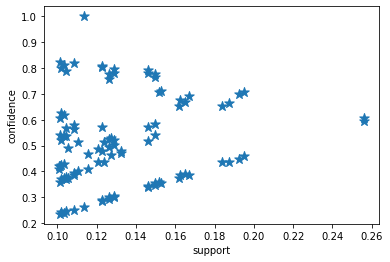

In [64]:
# visulisation for books data :
import matplotlib.pyplot as plt
support = []
for i in rules_book.support:
    support.append(i)
confidence = []
for j in rules_book.confidence:
    confidence.append(j)
plt.scatter(support, confidence, marker="*", s=100)
plt.xlabel("support")
plt.ylabel("confidence")

In [36]:
# ASSOCIATION RULES FOR movie_data :

data_movies = pd.read_csv(r'my_movies.csv')
data_movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [37]:
# create dummies :
data_movies = pd.get_dummies(data_movies)
data_movies                                         # (10,25)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [47]:
# apply apriori algorith :
frequent_items_movies = apriori(data_movies, min_support=0.4, use_colnames=True)
frequent_items_movies                   # too much variation in number of rules between min_support (0.4-0.5)

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Gladiator, Sixth Sense, V3_Sixth Sense, Patri..."
59,0.4,"(Gladiator, Sixth Sense, V1_Gladiator, V3_Sixt..."
60,0.4,"(Sixth Sense, V1_Gladiator, V3_Sixth Sense, Pa..."
61,0.4,"(Gladiator, V1_Gladiator, V3_Sixth Sense, Patr..."


In [48]:
rules_movies = association_rules(frequent_items_movies, metric="lift", min_threshold=0.7)
rules_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Sixth Sense),"(Gladiator, V1_Gladiator, V3_Sixth Sense, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(V1_Gladiator),"(Gladiator, Sixth Sense, V3_Sixth Sense, Patri...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(V3_Sixth Sense),"(Gladiator, Sixth Sense, V1_Gladiator, Patriot...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
600,(Patriot),"(Gladiator, Sixth Sense, V1_Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [50]:
rules_movies.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
249,"(V1_Gladiator, Sixth Sense, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
89,(V3_Sixth Sense),"(V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
256,"(Sixth Sense, Patriot)","(V1_Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
257,"(V3_Sixth Sense, Patriot)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
260,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
58,(Sixth Sense),"(V1_Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
55,"(V1_Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
43,"(Gladiator, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
41,(Sixth Sense),"(V1_Gladiator, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [51]:
rules_movies[rules_movies.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Sixth Sense),"(Gladiator, V1_Gladiator, V3_Sixth Sense, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(V1_Gladiator),"(Gladiator, Sixth Sense, V3_Sixth Sense, Patri...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(V3_Sixth Sense),"(Gladiator, Sixth Sense, V1_Gladiator, Patriot...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
600,(Patriot),"(Gladiator, Sixth Sense, V1_Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [55]:
# visulisation of movie_data:
support = []
for i in rules_movies.support:
    support.append(i)
support                     #(602,1)
confidence = []
for j in rules_movies.confidence:
    confidence.append(j)
confidence                 # (602,1)

[0.7142857142857143,
 0.8333333333333334,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 1.0,
 0.8571428571428572,
 1.0,
 1.0,
 0.8571428571428572,
 0.8571428571428572,
 1.0,
 0.5714285714285715,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666667,
 1.0,
 1.0,
 0.6666666666666667,
 1.0,
 0.6666666666666667,
 1.0,
 0.8,
 0.6666666666666667,
 1.0,
 0.5714285714285715,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 1.0,
 0.8,
 0.6666666666666667,
 0.5714285714285715,
 0.6666666666666667,
 0.8,
 0.6666666666666667,
 1.0,
 0.5714285714285715,
 0.6666666666666667,
 0.6666666666666667,
 0.8,
 1.0,
 1.0,
 0.5714285714285715,
 0.6666666666666667,
 1.0,
 1.0,
 0.6666666666666667,
 1.0,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 1.0,
 0.6666666666666667,
 1.0,
 0.6666666666666667,
 0.6666666666666667,
 0.6666666666666667,
 1.0,
 1.0,
 1.0,
 0.6666666666666

Text(0, 0.5, 'confidence')

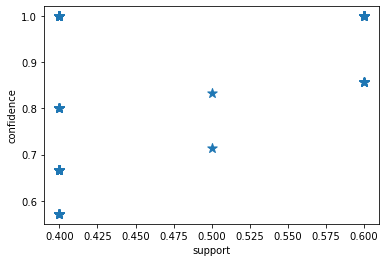

In [61]:
import matplotlib.pyplot as plt
plt.scatter(support, confidence, marker="*", s=100)
plt.xlabel("support")
plt.ylabel("confidence")